In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('social_networking_ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.shape

(400, 5)

In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

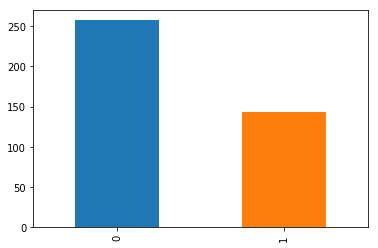

In [10]:
df['Purchased'].value_counts().plot.bar()

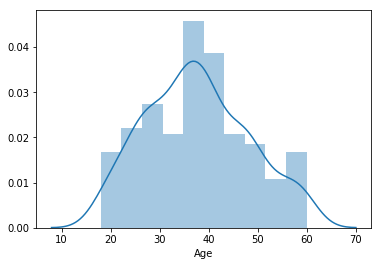

In [11]:
sns.distplot(df['Age'])

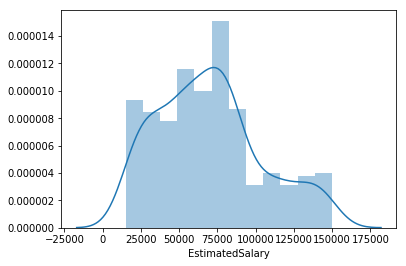

In [13]:
sns.distplot(df['EstimatedSalary'])

In [14]:
df1=pd.get_dummies(data=df)

In [17]:
df1.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


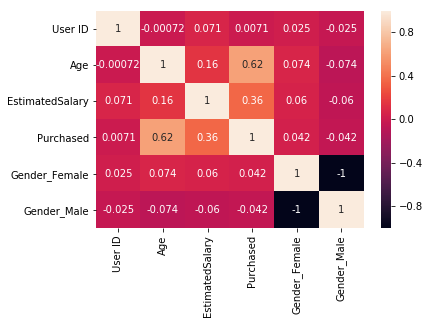

In [25]:
sns.heatmap(df1.corr(),annot=True)

In [26]:
df2=df1.drop(labels=['Gender_Male'],axis=1)
df2=df2.drop(labels=['User ID'],axis=1)

In [30]:
df2.head()

,Age,EstimatedSalary,Purchased,Gender_Female
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0


In [31]:
X=df2.iloc[:,[0,1,3]]
Y=df2.iloc[:,2]

In [32]:
from sklearn.model_selection import train_test_split


In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.fit_transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()
regression.fit(x_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
y_pred=regression.predict(x_test)

In [60]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8125

In [64]:
from sklearn import metrics
cm=metrics.confusion_matrix(Y_test,y_pred)
cm

array([[45,  3],
       [12, 20]], dtype=int64)